Visualisation
==============

The glucifer module provides a dynamic visualisation tool for Underworld data, similar in style to matplotlib.

**This notebook demonstrates:**

1. setting up figure objects
2. drawing meshes, surfaces, points and vector arrows
3. saving figures to file
4. publication ready figures
5. interactive viewer

**Keywords:** visualisation, glucifer, 3D plots, interactive plots

**Note** All classes and functions have corresponding docstrings which are available via the python `help()` function.

Import underworld and the glucifer modules.

In [1]:
import underworld as uw
import glucifer

The Figure
----------

The Figure class is a container object essential for glucifer visualisations.

In [2]:
newfigure = glucifer.Figure()

Figures remain active while they are in scope, or while some object retains a reference to them. 

Drawing Objects
---------------

Drawing objects are the items that are rendered within a `Figure`. 
Currently supported drawing objects:
 * `Mesh()`, renders a element mesh's geometry
 * `Suface()`, renders the scalar field over the mesh or a cross section thereof.
 * `Points()`, renders a Swarm 
 * `VectorArrows()`, renders vector arrows across a vector field (such as a VelocityField). 
 * `Volume()`, volume renders a scalar field
 * `IsoSurface()`, renders an isosurface of a scalar field
 * `Contours()`, renders contours of a scalar field. 

See `help(Drawing)` for options applicable to all drawing objects. 

**Mesh**

Render mesh geometry and node indices. Note, the `append()` method is used to attach this drawing object to a figure object lists of drawing objects. 


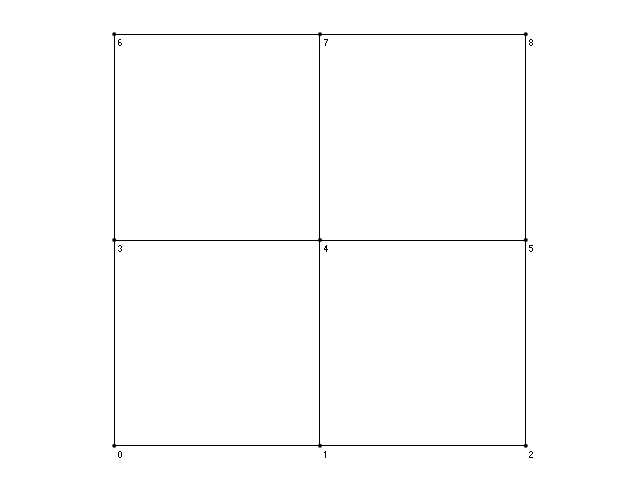

In [3]:
# create mesh and display it
mesh  = uw.mesh.FeMesh_Cartesian( 'Q1', (2,2), (0.,0.), (1.,1.) )
fig = glucifer.Figure ( edgecolour="black")
fig.Mesh( mesh, nodeNumbers=True ) 
fig.show()

**Surface**

This object will draw the desired faces of a scalar field. Check `help(Surface)` for the full options of the Surface drawing object.


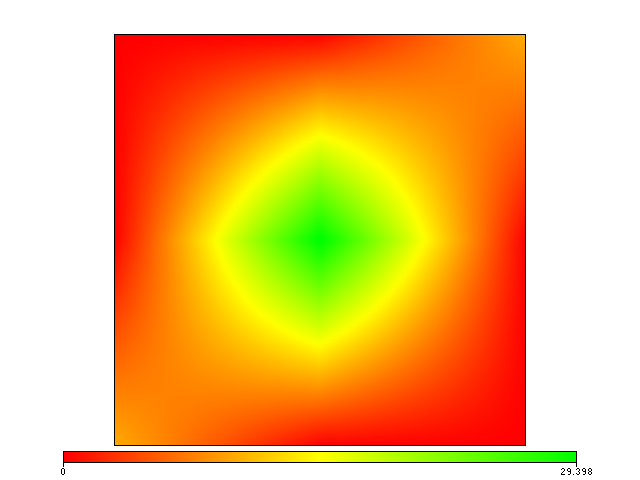

In [4]:
# create an object with a single value at each mesh point
fevar = uw.mesh.MeshVariable( mesh, 1 )
# give the variable some values
fevar.data[:] = 0.
fevar.data[0] = 10.
fevar.data[4] = 30.
fevar.data[8] = 10.

fig = glucifer.Figure ( edgecolour="black" )
fig.Surface( mesh, fevar, colours="red yellow green" )

fig.show()

**VectorArrows**

This object will draw an array of vector arrows across the image using the provided vector field to determine their direction. Check `help(VectorArrows)` for the full options of the VectorArrows drawing object.

In [5]:
# create a new meshvariable (note that it has 2 values at each mesh point)
fevarVec = uw.mesh.MeshVariable( mesh, 2 )
# initialise the vector field to something
fevarVec.data[:] = [ 0., 0.]
fevarVec.data[0] = [ 1., 1.]
fevarVec.data[1] = [ 0., 1.]
fevarVec.data[2] = [-1., 1.]
fevarVec.data[3] = [ 1., 0.]
fevarVec.data[5] = [-1., 0.]
fevarVec.data[6] = [ 1.,-1.]
fevarVec.data[7] = [ 0.,-1.]
fevarVec.data[8] = [-1.,-1.]

Create and show vector arrow figure.


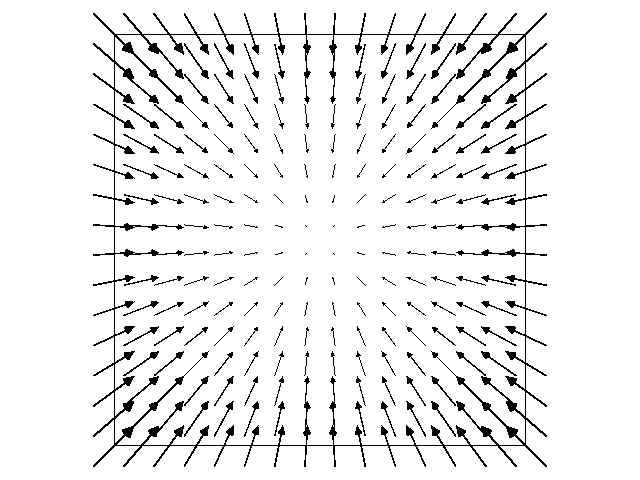

In [6]:
fig = glucifer.Figure( edgecolour="black" )
fig.VectorArrows( mesh, fevarVec, scaling=0.1, arrowHead=0.2 )
fig.show()

**Points**

This object will draw a swarm of points using the provided Underworld swarm for the point locations and an Underworld swarm variable for the point colours (or size or opacity). Check `help(Points)` for the full options of the Points drawing object.

Firstly, create a swarm over the whole mesh with 200 particles per cell.

In [7]:
swarm  = uw.swarm.Swarm( mesh=mesh )
layout = uw.swarm.layouts.GlobalSpaceFillerLayout( swarm=swarm, particlesPerCell=200 )
swarm.populate_using_layout( layout )

Plot the swarm particle distribution.


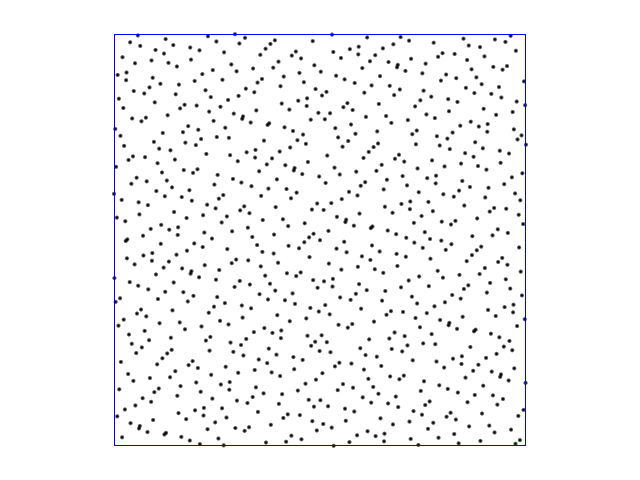

In [8]:
fig = glucifer.Figure( edgecolour="blue" )
fig.Points( swarm=swarm, pointSize=5, colourBar = False )
fig.show()

Now add a swarm variable to define the colour.

In [9]:
swarmVar = swarm.add_variable("double",1)
swarmVar.data[:]       = 0.
swarmVar.data[200:400] = 1.
swarmVar.data[400:600] = 2.
swarmVar.data[600:800] = 3.

In [10]:
someFn = uw.function.coord()[0]

Since there are 4 cells and 200 per cell we can divide the swarm up into 4 equal sections and give each a different colour. These will be randomly distributed around the figure. The ``fn_colour`` argument in the ``points`` object asigns colours to each swarm particle depending on the variable ``swarmVar``.  
`fn_colour` accepts `Function` objects too and is a powerful tool to quickly visualise a model setup. Set useVar to `False` to see the particle's coloured by there x coordinate


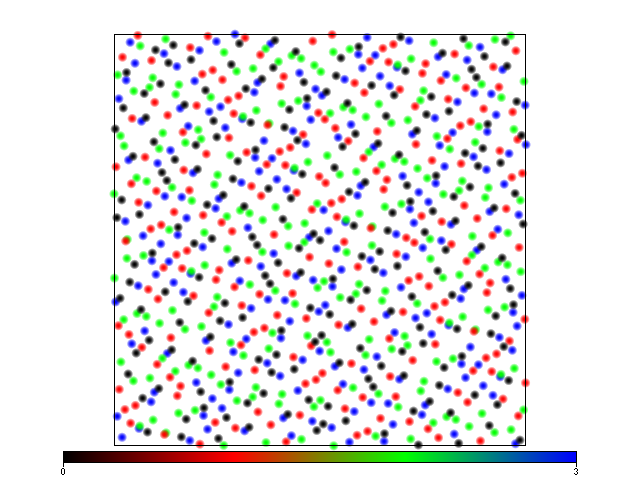

In [11]:
useVar = True
fig = glucifer.Figure( edgecolour="black" )

if useVar:
    fig.Points(swarm=swarm, fn_colour=swarmVar, pointSize=10, colours='black red green blue')
else:
    someFn = uw.function.coord()[0]
    fig.Points(swarm=swarm, fn_colour=someFn, pointSize=10, colours='black red green blue')
fig.show()

Image Layering
--------------
Multiple drawing objects can, of course, be layered upon each other to build up complex images. This is achieved by making multiple calls `append()`


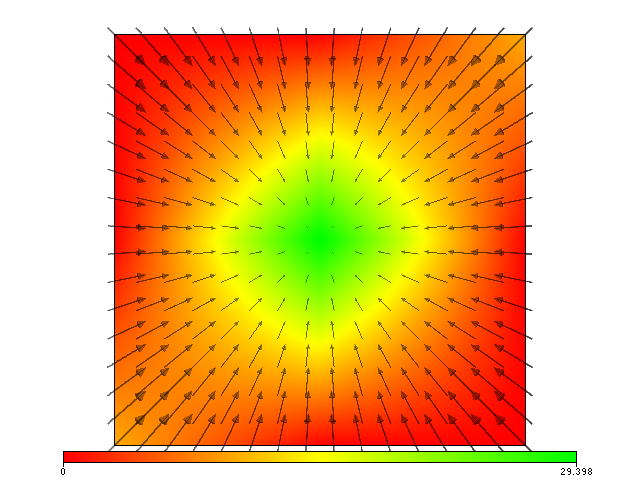

In [12]:
fig = glucifer.Figure( edgecolour="black" )
fig.VectorArrows( mesh, fevarVec, scaling=0.1, arrowHead=0.2, opacity=0.6 )
fig.Surface( mesh, fevar, colours="red yellow green" )
fig.show()

Saving Results
==========
To output results to raster files (such as PNG), simply use the `savefig()` method.

In [13]:
figfile = fig.save_image("savedfigure")
import glob
import os
if figfile: print(glob.glob( figfile ))

['savedfigure.png']


Let's clean up the directory by deleting this output figure file.

In [14]:
if figfile: os.remove( figfile )

Likewise, for those who wish to utilise the native viewer, the database object can be saved using the `saveDB()` method:

In [15]:
fig.save_database("dbFile.gldb")
print(glob.glob("dbFile.gldb"))

['dbFile.gldb']


Again, let's clean up the local directory.

In [16]:
os.remove( "dbFile.gldb" )

Publication quality figures
=====

With minor modifications gLucifer figures are easily made publication ready.

Firstly, let's increase the image quality with the "quality" parameter. Values can be 1 (low) to 3 (high), but note that higher values can take longer to render, especially for large images.

Here we also set the margin around the edges of the plot and apply rulers with tick labels.

In [17]:
fig = glucifer.Figure(title="Test Plot", quality=3, margin=50, rulers=True, rulerticks=5)

**Modifying surface plots**

Setup surface plot with colour gradient contrast bias towards more red (fix red as the colour for the value 25.0 by preceding the colour with this value in brackets) and some transparency (append a colon and the transparency value to the colour).

In [18]:
surf = fig.Surface( mesh, fevar, colours="red (25.0)yellow:0.8 green:0.5")

Alter the properties of the colour bar associated with the surface plot. Here we set the number of tick marks to 3 and the values of the first and third ticks, modify the margin and width and set the alignment to right (available values: left/right [vertical], bottom/top [horizontal]).

In [19]:
surf.colourBar["ticks"] = 3
surf.colourBar["position"] = 0.1
surf.colourBar["size"] = [0.8,0.04]
surf.colourBar["tickvalues"] = [10, 25]
surf.colourBar["align"] = "right"

**Adding floating labels**

Labels can be added by specifying the label text and position.

Font size can also be set with the "scaling" parameter.

A single font size applies to all labels on an object, so changing the font scaling of the default object will change all labels already added - to add a different sized label we attach it to a the surface object instead.

In [20]:
#Plot a label to the default figure object (fig.draw)
fig.draw.label("Label1 @ Centre", (0.2,0.7,0))
#Plot a lable to a previously added object
surf.label("Label2 @ Centre", (0.2,0.3,0), scaling=1.25)

Plot final figure to screen. This can also be saved to PNG/JPEG or a WebGL visualisation.


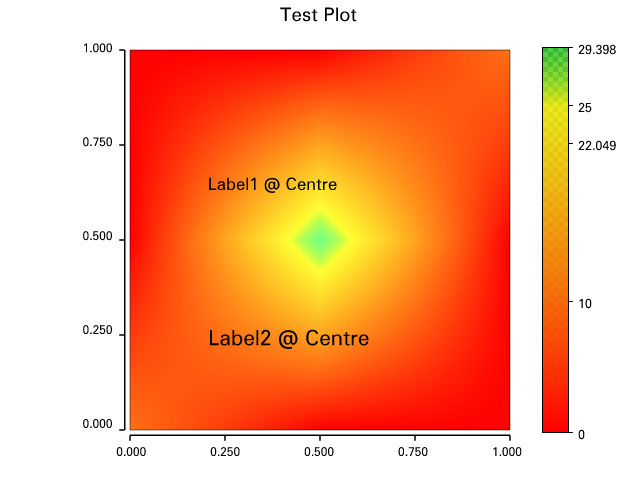

In [21]:
fig.show()

**Save a high resolution image**

The save image function takes an optional output width and height parameter (if width is provided without height, it will be calculated automatically)

In [22]:
fig.save_image("highdef.png", (1600,0))

'highdef.png'

Interactivity & Scripting
==========
An interactive viewer can be opened from inside the notebook by importing the "lavavu" module and using the figure's window() method:

In [23]:
fig = glucifer.Figure( edgecolour="black", quality=3 )
fig.Surface( mesh, fevar, colours="red yellow green", colourBar = False )
fig.VectorArrows( mesh, fevarVec, scaling=0.1, arrowHead=0.2)

Once this interactive viewer is open we can either shift the view using the mouse, or we can send commands to shift the view from inside the notebook.

In [24]:
if not glucifer.lavavu: raise KeyboardInterrupt #Stop notebook here if no vis enabled
lv = fig.window()
lv.rotate('y', 45)
lv.redisplay()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can retrieve a list of objects from a viewer by inspecting the "objects" property.
References to these objects can be used to modify the object appearance, either directly or using controls.

In [25]:
lv.reset() #Restore camera to default view
print(lv.objects)
surf = lv.objects["ScalarField_0"]
surf["opacity"] = 0.75
lv.redisplay()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-25-402da96707da>, line 2)

Interactive controls can be created to adjust visualisation parameters, here we control the opacity of the previously retrieved "surf" object and the global vector scaling parameter, changes will be reflected in the viewer window above:

In [ ]:
surf.control.Range(property="opacity", range=(0,1), command="reload")
lv.control.Range("scalevectors", value=1., range=(0.1, 2.5), step=0.1, label="Scale Arrows")
lv.control.show()